In [2]:
import pandas as pd

# Load the dataset
file_path = 'Amazon Sales data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
# Convert Order Date and Ship Date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Handle missing values (if any)
data = data.dropna()

# Additional transformations (e.g., extracting month and year)
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

# Display the transformed data
data.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013


In [4]:
# Month-wise Trend
month_wise_trend = data.groupby('Order Month').agg({'Total Revenue': 'sum'}).reset_index()

# Year-wise Trend
year_wise_trend = data.groupby('Order Year').agg({'Total Revenue': 'sum'}).reset_index()

# Yearly Month-wise Trend
year_month_wise_trend = data.groupby(['Order Year', 'Order Month']).agg({'Total Revenue': 'sum'}).reset_index()

# Display the trends
print(month_wise_trend)
print(year_wise_trend)
print(year_month_wise_trend)


    Order Month  Total Revenue
0             1    10482467.12
1             2    24740517.77
2             3     2274823.87
3             4    16187186.33
4             5    13215739.99
5             6     5230325.77
6             7    15669518.50
7             8     1128164.91
8             9     5314762.56
9            10    15287576.61
10           11    20568222.76
11           12     7249462.12
   Order Year  Total Revenue
0        2010    19186024.92
1        2011    11129166.07
2        2012    31898644.52
3        2013    20330448.66
4        2014    16630214.43
5        2015    12427982.86
6        2016    12372867.22
7        2017    13373419.63
    Order Year  Order Month  Total Revenue
0         2010            2     3410661.12
1         2010            5     2587973.26
2         2010            6     1082418.40
3         2010           10     6064933.75
4         2010           11     3458252.00
5         2010           12     2581786.39
6         2011            1     104

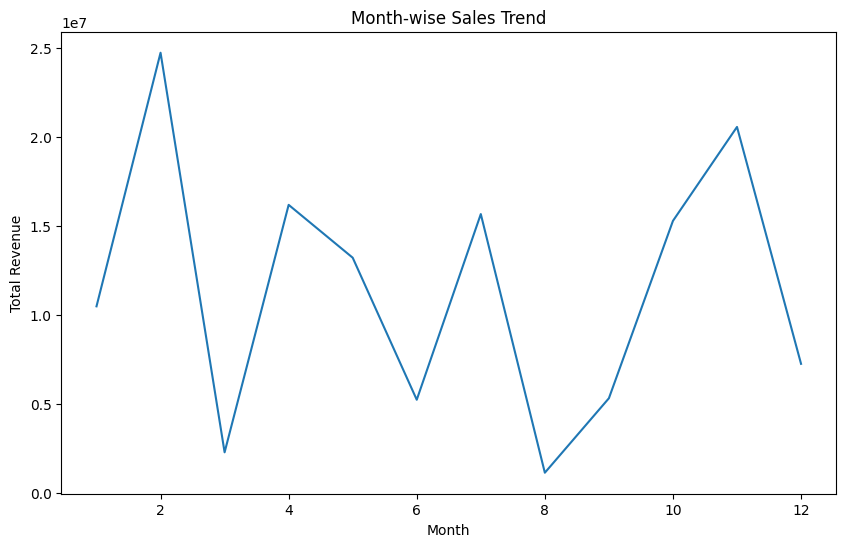

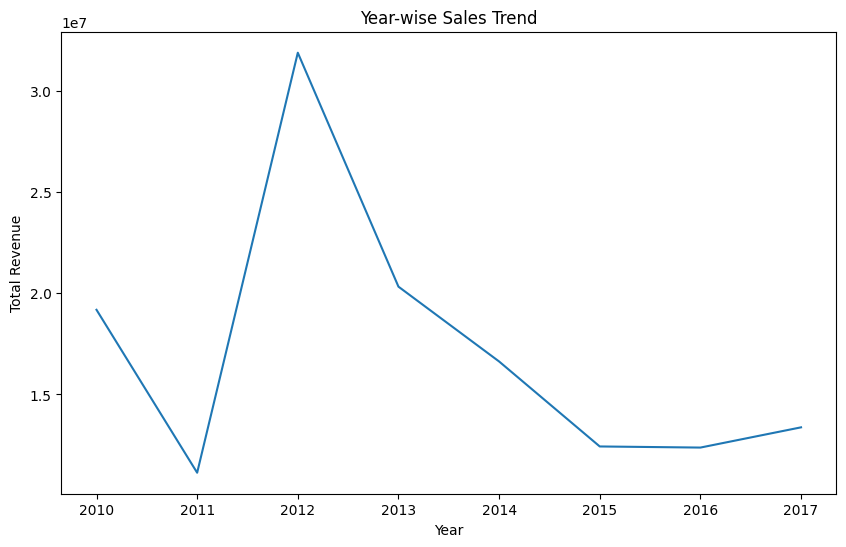

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Month-wise Trend Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order Month', y='Total Revenue', data=month_wise_trend)
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

# Year-wise Trend Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order Year', y='Total Revenue', data=year_wise_trend)
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()
